In [45]:
#import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [46]:
#Read input file
loan_data = pd.read_csv("loan.csv")
loan_data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [47]:
loan_data.shape


(39717, 111)

In [48]:
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

## There are columns with null data in all rows. We will delete the columns which have null data.

In [49]:
loan_data.dropna(axis = 1, how = 'all', inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [50]:
loan_data.isnull().sum()


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [51]:
loan_data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [52]:
loan_data.columns[loan_data.nunique()<=1]

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

## The columns mentioned in the above output contain the same value repeated across all the rows. Since there is no variation, these would not provide any insight. Hence, we will drop the columns using the below code.

In [53]:
loan_data.drop(['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'],axis=1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,NaN,Jun-07,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,NaN,Jun-07,NaN


In [54]:
loan_data.to_csv('temp.csv')

In [55]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

## From the above set of columns, we will eliminate further as many columns do not specifically contribute to our character analysis. The columns which we will eliminate are:['id','member_id','funded_amnt','funded_amnt_inv','term','int_rate','installment','emp_title','issue_d','pymnt_plan','url', 'desc','title','zip_code','addr_state','earliest_cr_line','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','revol_bal','total_acc','initial_list_status','out_prncp','out_prncp_inv','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','last_credit_pull_d','collections_12_mths_ex_med','policy_code','application_type','tax_liens']


In [56]:
loan_data=loan_data.drop(['id','member_id','funded_amnt','funded_amnt_inv','term','int_rate','installment','emp_title','issue_d','pymnt_plan','url', 'desc','title','zip_code','addr_state','earliest_cr_line','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','revol_bal','total_acc','initial_list_status','out_prncp','out_prncp_inv','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','last_credit_pull_d','collections_12_mths_ex_med','policy_code','application_type','tax_liens'],axis=1)

In [57]:
loan_data.columns


Index(['loan_amnt', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_util', 'total_pymnt',
       'last_pymnt_d', 'next_pymnt_d', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

In [58]:
loan_data.to_csv('temp.csv')

## Upon analysing the data, we find that there are a couple more columns.

- last_pymnt_d, next_pymnt_d >>> Dates are not helpful to our analysis
- acc_now_delinq, delinq_amnt,chargeoff_within_12_mths >>>These columns have single value throughout and no variation to analyze

In [59]:
loan_data=loan_data.drop(['last_pymnt_d', 'next_pymnt_d', 'acc_now_delinq','chargeoff_within_12_mths', 'delinq_amnt'],axis=1)

In [60]:
loan_data.columns


Index(['loan_amnt', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_util', 'total_pymnt',
       'pub_rec_bankruptcies'],
      dtype='object')

In [61]:
loan_data.to_csv('temp.csv')

### Creating csv file as it help in analysis of data.

## Now, let us eliminate the rows where the loan_status = "Current" . We are more focused on analysing the characteristics of borowers whose loans have been closed one way or another.

In [62]:
loan_data=loan_data[loan_data['loan_status']!="Current"]
loan_data.head(5)


,loan_amnt,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_pymnt,pub_rec_bankruptcies
0,5000,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0,3,0,83.70%,5863.155187,0.0
1,2500,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,1.00,0,3,0,9.40%,1008.710000,0.0
2,2400,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,0,2,0,98.50%,3005.666844,0.0
3,10000,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,20.00,0,10,0,21%,12231.890000,0.0
5,5000,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,11.20,0,9,0,28.30%,5632.210000,0.0


### We finally have the dataset that we can use to project a behavioural pattern. Let's check if the dataset is complete and doesn't contain any missing values.

In [63]:
loan_data.isna().sum()

loan_amnt                  0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
dti                        0
delinq_2yrs                0
open_acc                   0
pub_rec                    0
revol_util                50
total_pymnt                0
pub_rec_bankruptcies     697
dtype: int64

#### We can see that the columns emp_length, revol_util, and pub_rec_bankruptcies have rows with null values. We will fill these values with mode value appearing in each column.

In [64]:
print("Mode_emp_length : " + loan_data.emp_length.mode()[0])
print("Mode_revol_util : " + loan_data.revol_util.mode()[0])
print("Mode_pub_rec_bankruptcies : " + str((loan_data.pub_rec_bankruptcies.mode()[0])))




Mode_emp_length : 10+ years
Mode_revol_util : 0%
Mode_pub_rec_bankruptcies : 0.0


#### We get the above three mode values for respective coluumns. Let us fill these values in blank cells.

In [65]:
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)
loan_data.revol_util.fillna(loan_data.revol_util.mode()[0], inplace = True)
loan_data.pub_rec_bankruptcies.fillna(loan_data.pub_rec_bankruptcies.mode()[0], inplace = True)

In [66]:
loan_data.isna().sum()

loan_amnt               0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
delinq_2yrs             0
open_acc                0
pub_rec                 0
revol_util              0
total_pymnt             0
pub_rec_bankruptcies    0
dtype: int64

#### Now, our dataset is complete with no missing values.

In [67]:
loan_data.to_csv('temp.csv')
#maintaining running excel file for assistance in analysis

## Next Step is standardizing the data.

- The column revol_util is being treated as object due the symbol % being added. We will remove it so it becomes numerical
- The column emp_length, though representing numerical values, also contains string. We will convert everything to integer and make two assumption :
 - '<1 year' as 0
 - '>10 years' as 10


In [68]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   grade                 38577 non-null  object 
 2   sub_grade             38577 non-null  object 
 3   emp_length            38577 non-null  object 
 4   home_ownership        38577 non-null  object 
 5   annual_inc            38577 non-null  float64
 6   verification_status   38577 non-null  object 
 7   loan_status           38577 non-null  object 
 8   purpose               38577 non-null  object 
 9   dti                   38577 non-null  float64
 10  delinq_2yrs           38577 non-null  int64  
 11  open_acc              38577 non-null  int64  
 12  pub_rec               38577 non-null  int64  
 13  revol_util            38577 non-null  object 
 14  total_pymnt           38577 non-null  float64
 15  pub_rec_bankruptcie

In [69]:
loan_data.revol_util = pd.to_numeric(loan_data.revol_util.apply(lambda x : x.split('%')[0]))
loan_data.emp_length = pd.to_numeric(loan_data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))
loan_data.head()

,loan_amnt,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_pymnt,pub_rec_bankruptcies
0,5000,B,B2,10,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0,3,0,83.7,5863.155187,0.0
1,2500,C,C4,0,RENT,30000.0,Source Verified,Charged Off,car,1.00,0,3,0,9.4,1008.710000,0.0
2,2400,C,C5,10,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,0,2,0,98.5,3005.666844,0.0
3,10000,C,C1,10,RENT,49200.0,Source Verified,Fully Paid,other,20.00,0,10,0,21.0,12231.890000,0.0
5,5000,A,A4,3,RENT,36000.0,Source Verified,Fully Paid,wedding,11.20,0,9,0,28.3,5632.210000,0.0


### Now let's go a step further and try to eliminate the decimal points from the columns 'dti', 'annual_inc', 'revol_util', 'total_payment' and 'pub_rec_bankruptcies'. This will assist us in creating clean bins/categories out of continuous data.

In [70]:
loan_data = loan_data.astype({"dti":'int', "annual_inc":'int',"revol_util":'int',"total_pymnt":'int',"pub_rec_bankruptcies":'int'})
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   loan_amnt             38577 non-null  int64 
 1   grade                 38577 non-null  object
 2   sub_grade             38577 non-null  object
 3   emp_length            38577 non-null  int64 
 4   home_ownership        38577 non-null  object
 5   annual_inc            38577 non-null  int32 
 6   verification_status   38577 non-null  object
 7   loan_status           38577 non-null  object
 8   purpose               38577 non-null  object
 9   dti                   38577 non-null  int32 
 10  delinq_2yrs           38577 non-null  int64 
 11  open_acc              38577 non-null  int64 
 12  pub_rec               38577 non-null  int64 
 13  revol_util            38577 non-null  int32 
 14  total_pymnt           38577 non-null  int32 
 15  pub_rec_bankruptcies  38577 non-null

In [71]:

loan_data.to_csv('temp.csv')
loan_data.head(5)

,loan_amnt,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_pymnt,pub_rec_bankruptcies
0,5000,B,B2,10,RENT,24000,Verified,Fully Paid,credit_card,27,0,3,0,83,5863,0
1,2500,C,C4,0,RENT,30000,Source Verified,Charged Off,car,1,0,3,0,9,1008,0
2,2400,C,C5,10,RENT,12252,Not Verified,Fully Paid,small_business,8,0,2,0,98,3005,0
3,10000,C,C1,10,RENT,49200,Source Verified,Fully Paid,other,20,0,10,0,21,12231,0
5,5000,A,A4,3,RENT,36000,Source Verified,Fully Paid,wedding,11,0,9,0,28,5632,0


## Now our data is standardized and contains discreet values which provide better projection.

# Next Step: Outlier treatment

<AxesSubplot:xlabel='annual_inc'>

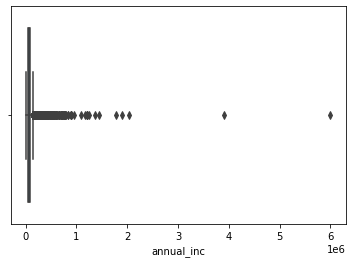

In [72]:
sns.boxplot(loan_data['annual_inc'])

#### The box plot is highly skewed, indicating presence of outliers. Hence,
- Analyzing quantile info
- Remove outliers accordingly

In [73]:
loan_data.annual_inc.quantile([0.25,0.5, 0.75,1])

0.25      40000.0
0.50      58868.0
0.75      82000.0
1.00    6000000.0
Name: annual_inc, dtype: float64

#### The fourth quartile contains abnormally high value. Hence, refining further.

In [74]:
loan_data.annual_inc.quantile([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99])

0.90    115000.0
0.91    120000.0
0.92    122000.0
0.93    127500.0
0.94    134000.0
0.95    140004.0
0.96    150000.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

#### The values after 95th percentile seem to be increasing sharply and do not relate to the rest of the set. Hence, we will remove the data after 95th percentile for our analysis.

In [75]:
threshold = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <= threshold]

<AxesSubplot:xlabel='annual_inc'>

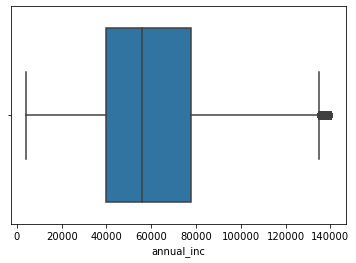

In [76]:
sns.boxplot(loan_data['annual_inc'])

### After removing the outliers, the box plot looks good. Proceeding to next variable.

<AxesSubplot:xlabel='dti'>

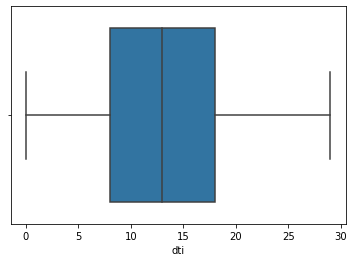

In [77]:
sns.boxplot(loan_data.dti)

<AxesSubplot:xlabel='emp_length'>

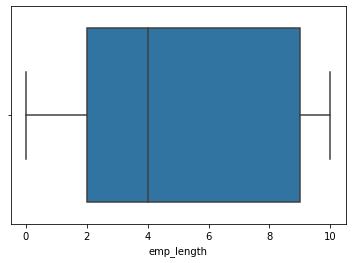

In [78]:
sns.boxplot(loan_data.emp_length)

<AxesSubplot:xlabel='loan_amnt'>

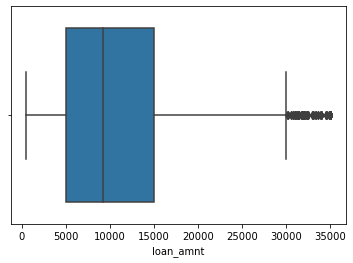

In [79]:
sns.boxplot(loan_data.loan_amnt)

<AxesSubplot:xlabel='delinq_2yrs'>

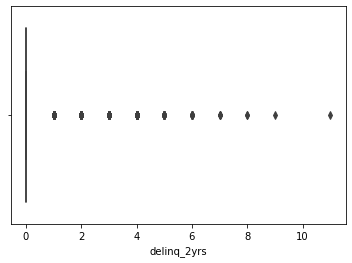

In [80]:
sns.boxplot(loan_data.delinq_2yrs)

In [81]:
loan_data.delinq_2yrs.quantile([0.25,0.5, 0.75,1])

0.25     0.0
0.50     0.0
0.75     0.0
1.00    11.0
Name: delinq_2yrs, dtype: float64

In [82]:
loan_data.delinq_2yrs.quantile([0.8,0.85,0.89,0.9,0.95,0.97,0.99,0.999,1])

0.800     0.0
0.850     0.0
0.890     0.0
0.900     1.0
0.950     1.0
0.970     1.0
0.990     2.0
0.999     4.0
1.000    11.0
Name: delinq_2yrs, dtype: float64

#### As we can see above, the column 'delinq_2yrs' contains the value 0 uptil 89th percentile, and then sharply increases to 11 nearing the 100th percentile. We can safely assume the values starting from 90th percentile as outliers and remove them.

In [83]:
threshold = loan_data['delinq_2yrs'].quantile(0.9)
loan_data = loan_data[loan_data.delinq_2yrs <= threshold]

<AxesSubplot:xlabel='delinq_2yrs'>

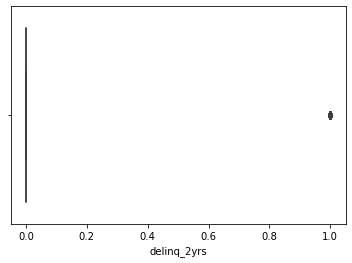

In [84]:
sns.boxplot(loan_data.delinq_2yrs)

#### Now, incidentally all the rows of the column 'delinq_2yrs' contain the value 0 and is not helpful for analysis. So we will drop this column as well.

In [85]:
loan_data=loan_data.drop('delinq_2yrs',axis=1)

In [86]:
loan_data.to_csv('temp.csv')

## Visualising Categorical data now.

### First let's see the count of fully paid loans vs charged off loans.

<AxesSubplot:xlabel='loan_status', ylabel='count'>

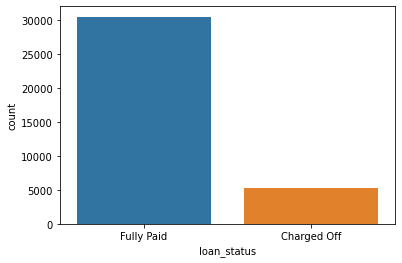

In [87]:
sns.countplot(x = 'loan_status', data = loan_data)

#### It is evident that fully paid loans are greater in number than the charged off loans. But that is irrelevant to our analysis scope. For our further analysis we will be focusing on the charged off loan data.

#### As we already have a grade colum, it would be better if we convert the subgrade column to integer by removing the letters. It will help in plotting the graph.

In [88]:
loan_data['sub_grade'] = pd.to_numeric(loan_data['sub_grade'].apply(lambda x : x[-1]))
loan_data.head(5)
loan_data.to_csv('temp.csv')

<AxesSubplot:xlabel='grade', ylabel='count'>

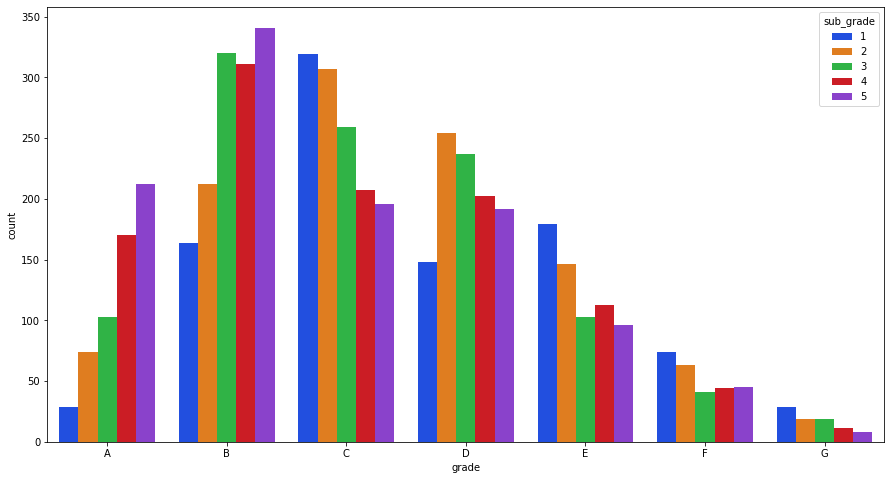

In [91]:
fig, ax = plt.subplots(figsize=(15,8))
sns.set_palette('bright')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_data[loan_data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='grade', ylabel='count'>

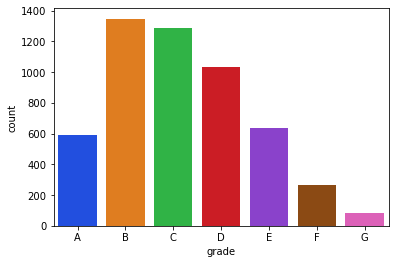

In [93]:
sns.countplot(x = 'grade', data = loan_data[loan_data.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])


### Analyzing 'home_owner' data

In [94]:
#checking unique values for home_ownership
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

#### There are only 3 records with 'NONE' value in the data. So replacing the value with 'OTHER'


In [95]:
loan_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [96]:
loan_data.to_csv('temp.csv')
#Maintaining csv for assistance

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

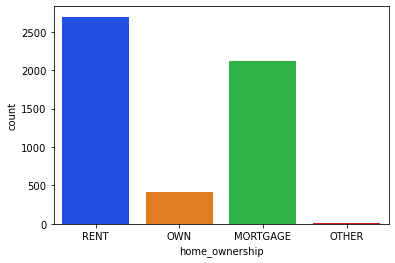

In [115]:
fig, ax = plt.subplots(figsize = (6,4))
sns.countplot(x='home_ownership', data=loan_data[loan_data['loan_status']=='Charged Off'])

#### Analysing purpose

<AxesSubplot:xlabel='count', ylabel='purpose'>

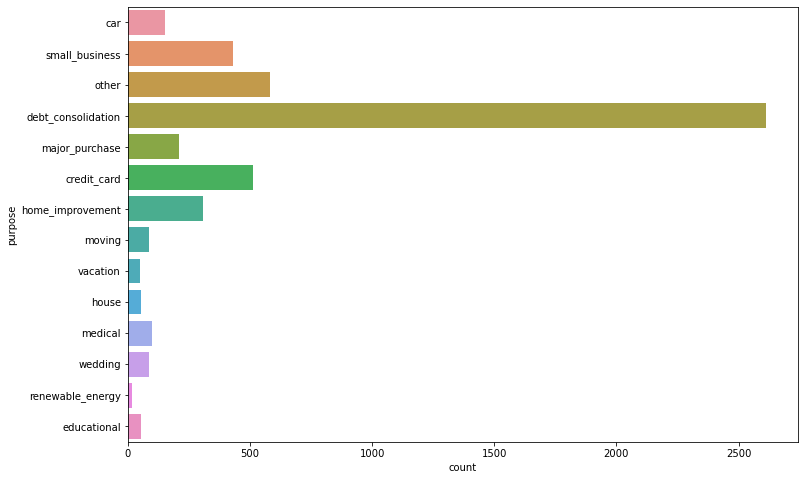

In [116]:
fig, ax = plt.subplots(figsize = (12,8))
sns.countplot(y ='purpose', data=loan_data[loan_data.loan_status == 'Charged Off'])

### Analyzing verification status

<AxesSubplot:xlabel='count', ylabel='verification_status'>

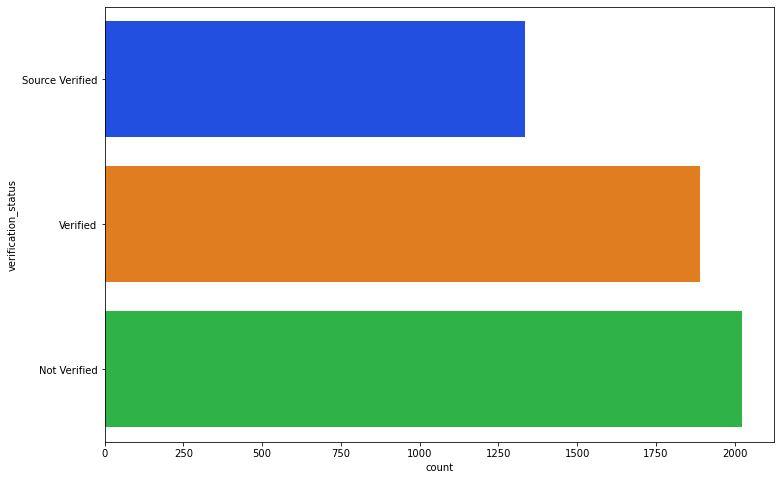

In [114]:
fig, ax = plt.subplots(figsize = (12,8))
sns.countplot(y ='verification_status', data=loan_data[loan_data.loan_status == 'Charged Off'])

### Analysing pub_rec

<AxesSubplot:xlabel='count', ylabel='pub_rec'>

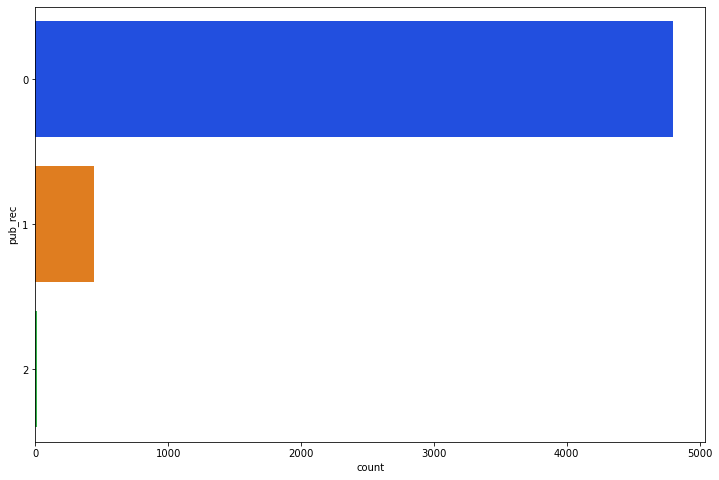

In [127]:
fig, ax = plt.subplots(figsize = (12,8))
#ax.set(xscale = 'log')
sns.countplot(y ='pub_rec', data=loan_data[loan_data.loan_status == 'Charged Off'])

### Analysing pub_rec_bankruptcies

<AxesSubplot:xlabel='count', ylabel='pub_rec_bankruptcies'>

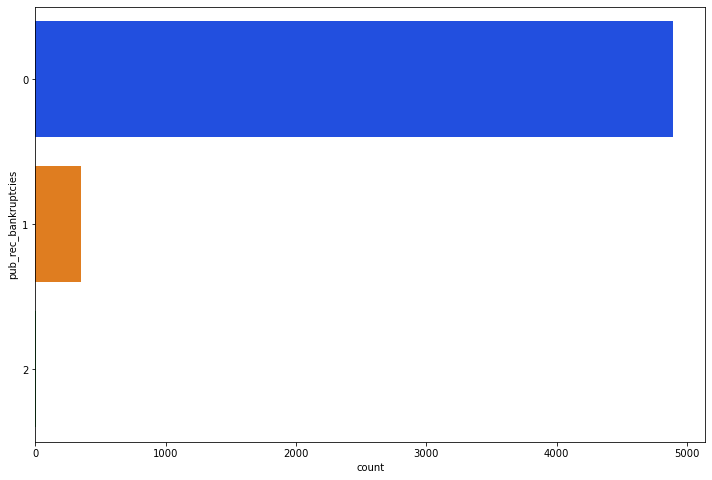

In [126]:
fig, ax = plt.subplots(figsize = (12,8))
sns.countplot(y ='pub_rec_bankruptcies', data=loan_data[loan_data.loan_status == 'Charged Off'])

### Analysing emp_length

<AxesSubplot:xlabel='emp_length', ylabel='count'>

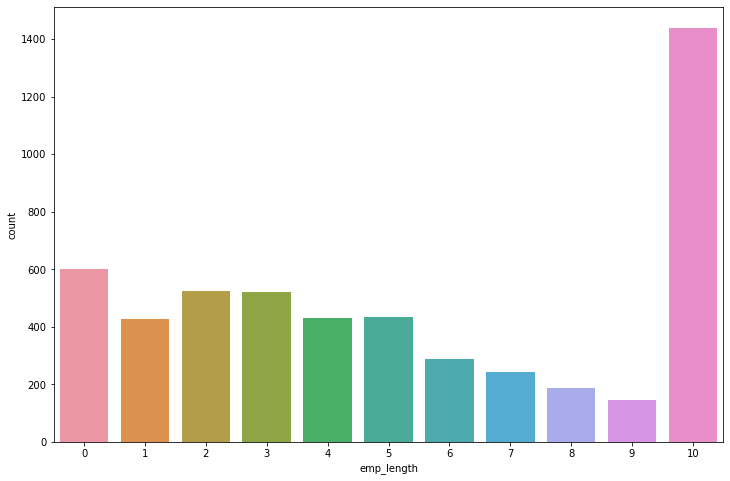

In [106]:
fig, ax = plt.subplots(figsize = (12,8))
sns.countplot(x ='emp_length', data=loan_data[loan_data.loan_status == 'Charged Off'])

### Let's create some bins for some columns to make them categorical

In [117]:
#creating bins for open_acc, annual_inc and revol_util
loan_data['open_acc_groups'] = pd.cut(loan_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_data['revol_util_groups'] = pd.cut(loan_data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_data['dti_groups'] = pd.cut(loan_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

In [118]:
loan_data.to_csv('temp.csv')
# updating csv for assistance

### Analyzing revol_util_groups


<AxesSubplot:xlabel='revol_util_groups', ylabel='count'>

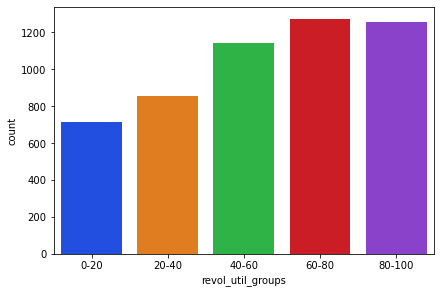

In [119]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='revol_util_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

### Analyzing open_acc_groups

<AxesSubplot:xlabel='open_acc_groups', ylabel='count'>

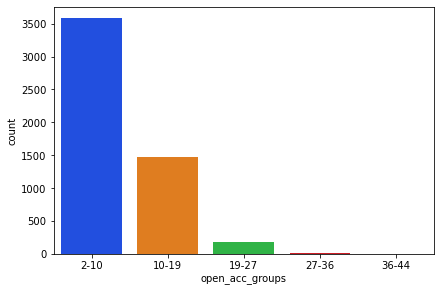

In [120]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='open_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

### Analysing annual_inc_groups

<AxesSubplot:xlabel='annual_inc_groups', ylabel='count'>

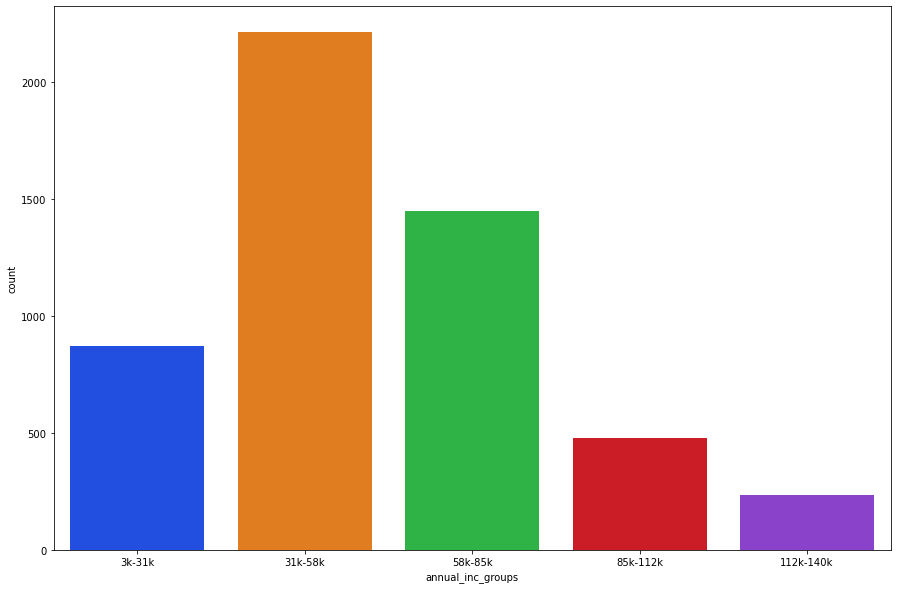

In [121]:
fig, ax = plt.subplots(figsize = (15,10))
sns.countplot(x='annual_inc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

### Analyzing dti_groups

<AxesSubplot:xlabel='dti_groups', ylabel='count'>

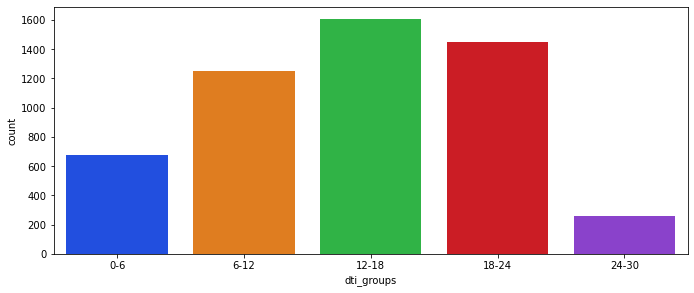

In [124]:
fig, ax = plt.subplots(figsize = (25,10))
plt.subplot(221)
sns.countplot(x='dti_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

### Analyzing loan_amnt_groups

<AxesSubplot:xlabel='loan_amnt_groups', ylabel='count'>

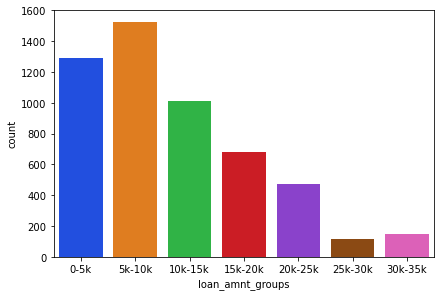

In [125]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='loan_amnt_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

# Observations- For above univariate analysis
- highest number of defaulters have taken small loans (0-10k). It can be said that people consider this a petty amount for a bank take it casually.
- Borrowers with dti between 6 to 24 are more likely to default
- Majority of the defaulters lie in the income category of 31k to 58k
- Higher the number of the open credit accounts, higher is the credibility of the borrower
- Revolving utility rate of 50% or higher poses a risk for the bank as the probability for a default rises based on evidence.
- Ironically, people who are employed for 10 years or more are more likely to default. We might need to dig in further here.
- Public record of bankruptcies does not provide useful data as majority of defaulters have 0 bankruptcies.
- Majority of defaulters have a clean public record as well.
- Bank must ensure that the applicant is source verified to mitigate the risk of a charge off.
- Loans taken for the purpose of debt consolidation carry a huge risk of default.
- Homeowners are less likely to default whereas those on rent or have properties in mortgage pose a considerable risk of charge off.
- Loans with subgrades B3, B4, B5, C1 and C2 are more likely to succumb to a charge off.




# Some multi variate analysis now.

### Annual income vs loan purpose

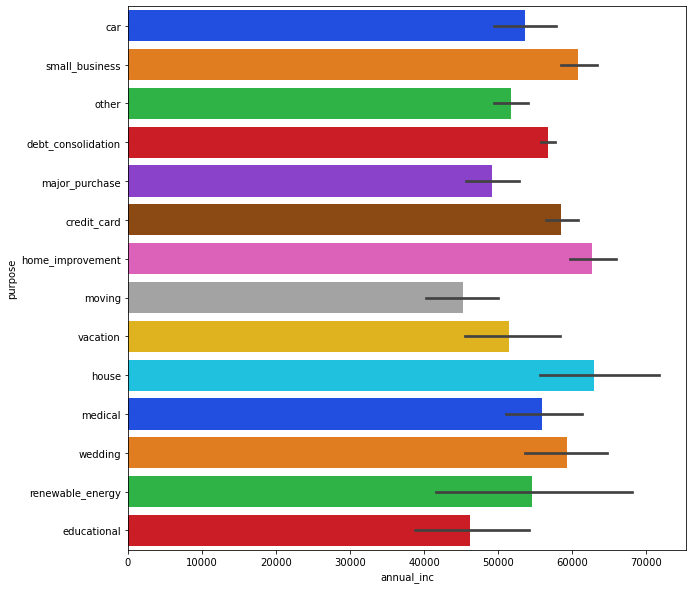

In [130]:
plt.figure(figsize=(10,10))
sns.barplot(x='annual_inc', y='purpose', data=loan_data[loan_data.loan_status == 'Charged Off'],palette="bright")
plt.show()

### Annual income vs employment length

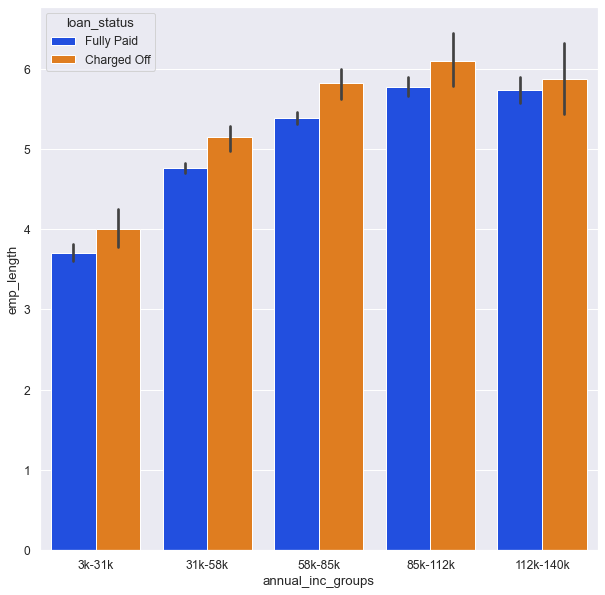

In [145]:
plt.figure(figsize=(10,10))
sns.barplot(x='annual_inc_groups', y='emp_length', data=loan_data,hue='loan_status',palette="bright")
plt.show()

### Annual income vs home ownership

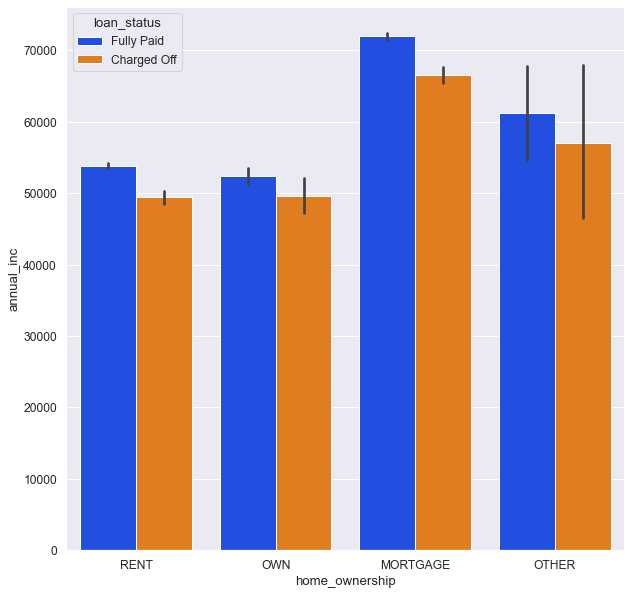

In [147]:
plt.figure(figsize=(10,10))
sns.barplot(data=loan_data,hue='loan_status',x='home_ownership', y='annual_inc',palette="bright")
plt.show()

### Annual income vs loan amount

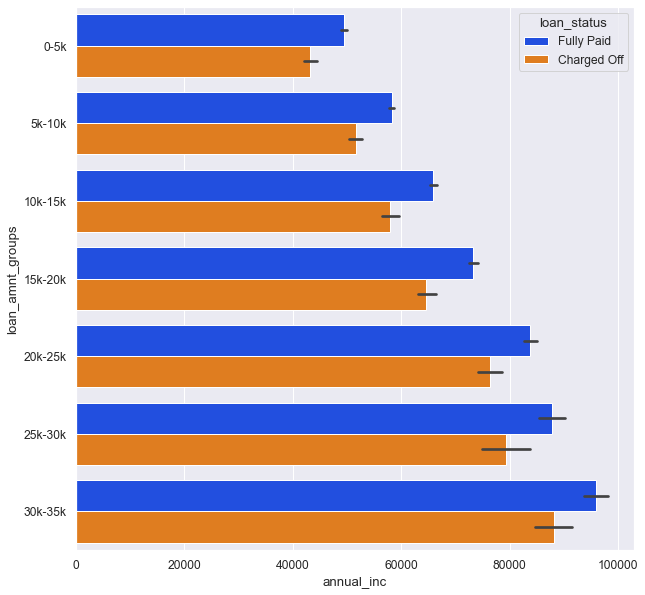

In [148]:
plt.figure(figsize=(10,10))
sns.barplot(data=loan_data,hue='loan_status',x='annual_inc', y='loan_amnt_groups',palette="bright")
plt.show()

### Loan amount vs home ownership

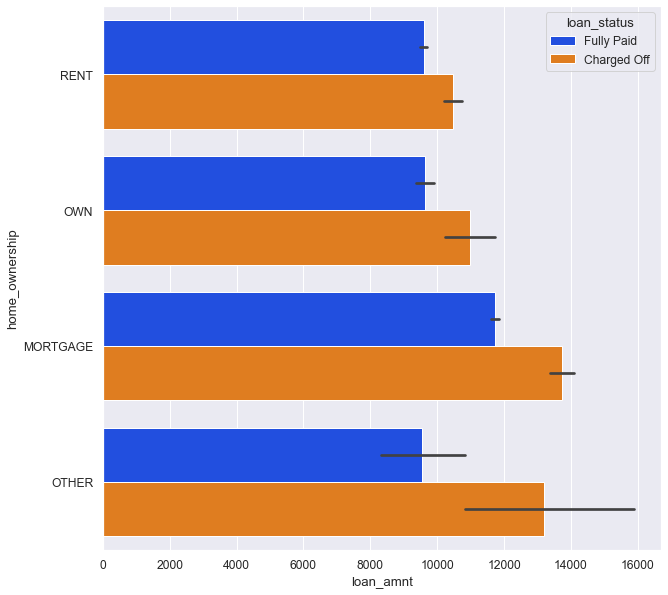

In [149]:
plt.figure(figsize=(10,10))
sns.barplot(data=loan_data,hue='loan_status',x='loan_amnt', y='home_ownership',palette="bright")
plt.show()

### Loan amount vs verification status

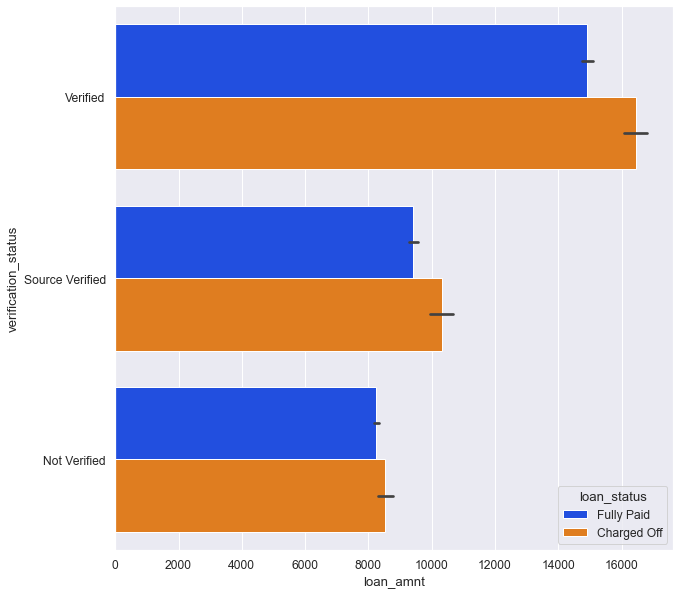

In [150]:
plt.figure(figsize=(10,10))
sns.barplot(data=loan_data,hue='loan_status',x='loan_amnt', y='verification_status',palette="bright")
plt.show()

# Observation- For above bivariate analysis
- Those with verification status as "verified" tend to apply for bigger loans and default
- There is parity in the "Not verified" class of loans.
- However, bank is losing in every segment as the number of charge off's are greater than fully paid. 
- If closely observed, the loan amount range for charged off loans seems to be between 8k to 18k
- This same pattern of charge off's being greater than fully paid is observed when we plot loan amount vs home ownership.Observing the plot reinforces assumption that majority of loans rangning from 8k to 18k are in a risk of default
- Analysing the annual income vs loan amount groups chart, we can say that generally speaking people tend to fully pay the loan. It is evident in the graph where the charge off's are less than the fully paid for every income segment.
- It is interesting to note that even though the income level and employment durations of people increase, the probability of loan default still stays higher than than getting fully paid.
- People in the income range 60k to 80k tend to seek out a loan for either house, home improvement, or small business. And then tend to default on those loans.